In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Attenuation EXP without ambient light/"
all_files = glob.glob(path + "*.csv")

#turn all 512 files into lists
var = [pd.read_csv(filename,index_col=None,header=0,skiprows=17) for filename in all_files]

#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(var,axis=0,ignore_index=True)

#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Excitation_Pulse','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Return_532nm']
dataframe.columns = rename

#change the data type
Clean_dataframe = dataframe.astype(float)

uniform_dataframe=Clean_dataframe.assign(Time = Clean_dataframe['Time']*1e9)

#Setting the Time as the index column
uniform_dataframe.set_index("Time",drop=True,inplace=True)

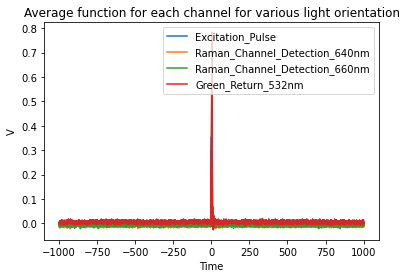

In [3]:
#Plot all columns against Time
plot_columns = ['Excitation_Pulse','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Return_532nm']
uniform_dataframe[plot_columns].plot()

plt.xlabel('Time')
plt.ylabel('V')
plt.title('Average function for each channel for various light orientation')
plt.show()

In [4]:
#Split the large dataframe into 512 smaller dataframes
def split_dataframe_by_position(df, splits):
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(uniform_dataframe, 7)
#Test if our split is working
print('Quick test, the max value of the first dataframe = ',split_dataframes[0].Excitation_Pulse.max(),'V')
print('Quick test, the max value of the last dataframe = ',split_dataframes[6].Excitation_Pulse.max(),'V')

Quick test, the max value of the first dataframe =  0.354359 V
Quick test, the max value of the last dataframe =  0.0574687 V


In [5]:
#
localMaxVoltage_ExcitationPulse = []
localMaxVoltage_greenReturn = []
localMaxVoltage_ramanChannel660nm = []
localMaxVoltage_ramanChannel640nm = []

i = 0
for i in range(0,7,1):
    localMaxVoltage_ExcitationPulse.append(split_dataframes[i].Excitation_Pulse.max())
    localMaxVoltage_greenReturn.append(split_dataframes[i].Green_Return_532nm.max())
    localMaxVoltage_ramanChannel660nm.append(split_dataframes[i].Raman_Channel_Detection_660nm.max())
    localMaxVoltage_ramanChannel640nm.append(split_dataframes[i].Raman_Channel_Detection_640nm.max())

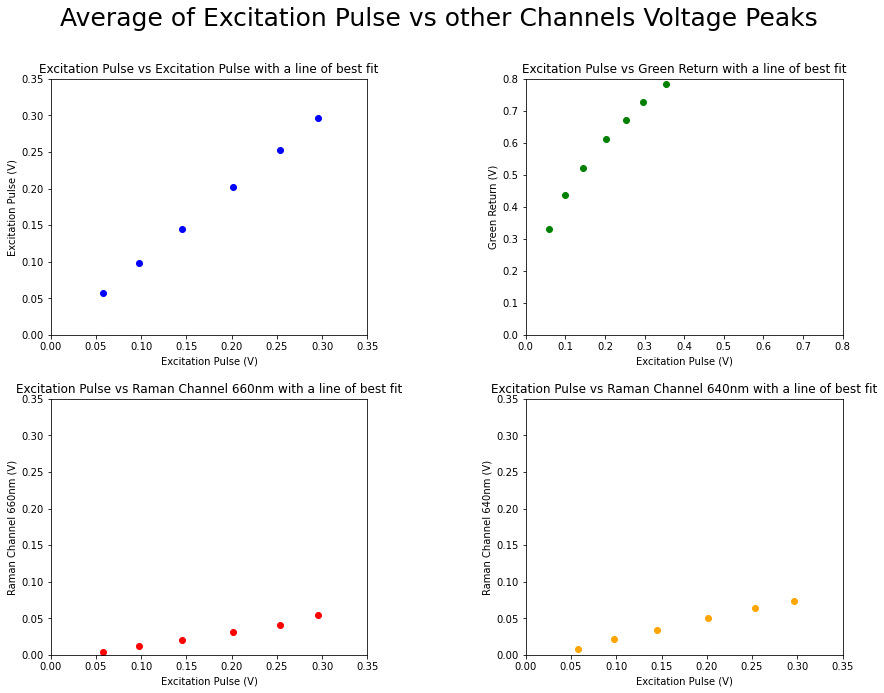

In [20]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ExcitationPulse, c='blue')
a0, b0 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ExcitationPulse, 1)
#ax1.plot(localMaxVoltage_ExcitationPulse, a0*np.array(localMaxVoltage_ExcitationPulse) + b0, color='steelblue', linestyle='--', linewidth=2)
ax1.set_title('Excitation Pulse vs Excitation Pulse with a line of best fit')
ax1.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Excitation Pulse (V)', xlim = (0,0.35), ylim = (0,0.35))

ax2.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_greenReturn, c='green')
a1, b1 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_greenReturn, 1)
#ax2.plot(localMaxVoltage_ExcitationPulse, a1*np.array(localMaxVoltage_ExcitationPulse) + b1, color='steelblue', linestyle='--', linewidth=2)
ax2.set_title('Excitation Pulse vs Green Return with a line of best fit')
ax2.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Green Return (V)', xlim = (0,0.8), ylim = (0, 0.8))

ax3.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ramanChannel660nm, c='red')
a2, b2 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ramanChannel660nm, 1)
#ax3.plot(localMaxVoltage_ExcitationPulse, a2*np.array(localMaxVoltage_ExcitationPulse) + b2, color='steelblue', linestyle='--', linewidth=2)
ax3.set_title('Excitation Pulse vs Raman Channel 660nm with a line of best fit')
ax3.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Raman Channel 660nm (V)', xlim = (0,0.35), ylim = (0,0.35))

ax4.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ramanChannel640nm, c='orange')
a3, b3 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ramanChannel640nm, 1)
#ax4.plot(localMaxVoltage_ExcitationPulse, a3*np.array(localMaxVoltage_ExcitationPulse) + b3, color='steelblue', linestyle='--', linewidth=2)
ax4.set_title('Excitation Pulse vs Raman Channel 640nm with a line of best fit')
ax4.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Raman Channel 640nm (V)', xlim = (0,0.35), ylim = (0,0.35))

fig.suptitle('Average of Excitation Pulse vs other Channels Voltage Peaks', fontsize=25, x=0.64, y=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()